In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [2]:
def getData(path):
    df = pd.read_csv(path)
    df = df.iloc[:, 1:]
    print(df.shape)
    print(df)

    dataSet = df.to_numpy()

    np.random.seed(222)
    np.random.shuffle(dataSet)

    y = dataSet[:,-1:]
    X = dataSet[:,:-1]

    print('dim mat: ', X.shape)
    print('dim class: ', y.shape)
    return [X, y]

path = 'data/cooked/google-third-place-Boston_DistanceClosest.csv'
[X_dis, y_dis] = getData(path)

(6179, 96)
      beauty_salon    campground       stadium       airport    car_rental  \
0         0.000000    956.929726    693.721915   8346.022623   1166.389635   
1       956.929726      0.000000    588.811145   8601.973573   2103.179410   
2      2878.590389      0.000000     64.396229   6194.687440   3233.059010   
3      5856.663978      0.000000    274.271322   2509.369231   2270.981159   
4      2874.837820   3829.006426      0.000000   7973.283978   1743.167382   
...            ...           ...           ...           ...           ...   
6174   5983.153369   1934.234151   1816.985521   3527.260875   4205.146931   
6175   7422.961444   3387.260803   1678.080905   4037.989962   5576.192675   
6176   7442.110614   3344.262229   1633.627229   3966.101314   5524.863218   
6177   7512.143541   3379.799512   1563.237814   3954.767374   5550.695524   
6178  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   

         locksmith       embassy          cafe      

In [100]:
def processDataForTrain(X, y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=30)
    stdScaleDis = StandardScaler()
    stdScaleDis.fit(X_train)
    X_train = stdScaleDis.transform(X_train)
    X_test  = stdScaleDis.transform(X_test)
    ### test – addressing bug where shape in train_x and train_y aren't equal
    # Y_df = pd.DataFrame(to_categorical(Y_train))
    # Y_df[94] = np.float32(0)
    # Y_train = Y_df.to_numpy()
    # Y_train_outHot = Y_train

    Y_test_df = pd.DataFrame(to_categorical(Y_test))
    Y_test_df[94] = np.float32(0)
    Y_test = Y_test_df.to_numpy()
    Y_test_outHot = Y_test
    ### end test
    Y_train_outHot = to_categorical(Y_train) # original
    # Y_test_outHot = to_categorical(Y_test) # original
    # xDim = X_train.shape[1] # not used
    # yDim = Y_test_outHot.shape[1] # not used

    return {
        'train_x': X_train,
        'test_x': X_test,
        'train_y': Y_train_outHot,
        'test_y': Y_test_outHot,
        'scaler': stdScaleDis,
        
    }

dataTrain_dis = processDataForTrain(X_dis, y_dis)
dataTrain_dis

{'train_x': array([[ 0.11240497, -1.03040972, -0.18538618, ..., -0.71525794,
         -1.33343795,  0.03889549],
        [-0.76495194, -0.96130876, -0.05951045, ..., -0.38431058,
         -1.01666133,  0.03889549],
        [-0.95207981,  0.14734671, -0.55342944, ..., -0.8180648 ,
          1.93133801,  0.03889549],
        ...,
        [ 1.02272077, -0.42541034, -0.51251081, ...,  0.42207366,
         -0.50919669,  0.03889549],
        [ 1.28109784,  2.16720807, -0.32036434, ...,  0.64777293,
          1.1231263 ,  0.03889549],
        [-0.85305355, -1.21011484, -0.85080146, ..., -0.60766744,
         -0.77208002,  0.03889549]]),
 'test_x': array([[-0.89214962, -1.18737452, -0.79596931, ..., -0.37847038,
         -0.7704896 ,  0.03889549],
        [-0.05769601, -0.6515281 ,  0.93966207, ..., -0.85704201,
         -0.92970728,  0.03889549],
        [-0.41021787, -0.67886731,  0.9932065 , ...,  2.19038734,
          0.07420918,  0.03889549],
        ...,
        [-0.50999474, -0.88582077

In [101]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.layers import Dense

modelDis = Sequential()
modelDis.add(Dense(1024, input_dim=dataTrain_dis['train_x'].shape[1], activation='relu')) # original
# modelDis.add(Dense(1024, input_dim=dataTrain_dis['train_x'].shape[1], activation='sigmoid')) # test
modelDis.add(Dense(512, activation='relu'))
modelDis.add(Dense(dataTrain_dis['train_y'].shape[1], activation='softmax'))
modelDis.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy']) # original
# modelDis.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy']) # test

In [102]:
print(dataTrain_dis["train_x"].shape[1] == dataTrain_dis["train_y"].shape[1])
print(dataTrain_dis["test_x"].shape[1] == dataTrain_dis["test_y"].shape[1])
print(dataTrain_dis["train_x"].shape[1])
print(dataTrain_dis["train_y"].shape[1])
print(dataTrain_dis["test_x"].shape[1])
print(dataTrain_dis["test_y"].shape[1])

True
True
95
95
95
95


In [103]:
import time
start_time = time.time()

hist = modelDis.fit( 
    dataTrain_dis['train_x'], dataTrain_dis['train_y'], 
    validation_data=(dataTrain_dis['test_x'], dataTrain_dis['test_y']), 
    batch_size=32,
    epochs=50, 
    )

print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/50


145/145 [==============================] - 0s 2ms/step - loss: 3.7470 - accuracy: 0.0863 - val_loss: 3.5325 - val_accuracy: 0.1107
Epoch 2/50
145/145 [==============================] - 0s 2ms/step - loss: 3.1953 - accuracy: 0.1688 - val_loss: 3.3519 - val_accuracy: 0.1573
Epoch 3/50
145/145 [==============================] - 0s 2ms/step - loss: 2.8852 - accuracy: 0.2212 - val_loss: 3.1872 - val_accuracy: 0.1657
Epoch 4/50
145/145 [==============================] - 0s 2ms/step - loss: 2.6387 - accuracy: 0.2553 - val_loss: 3.0588 - val_accuracy: 0.1981
Epoch 5/50
145/145 [==============================] - 0s 2ms/step - loss: 2.4683 - accuracy: 0.2838 - val_loss: 2.9602 - val_accuracy: 0.2168
Epoch 6/50
145/145 [==============================] - 0s 2ms/step - loss: 2.3111 - accuracy: 0.3084 - val_loss: 2.9602 - val_accuracy: 0.2175
Epoch 7/50
145/145 [==============================] - 0s 2ms/step - loss: 2.1876 - accuracy: 0.3315 - val_loss: 3.0052 - val_accuracy: 0.2227
Epoch 8/50
145/14

49/49 [==============================] - 0s 764us/step - loss: 3.5832 - accuracy: 0.2744
result:  [3.583205223083496, 0.2744336426258087]


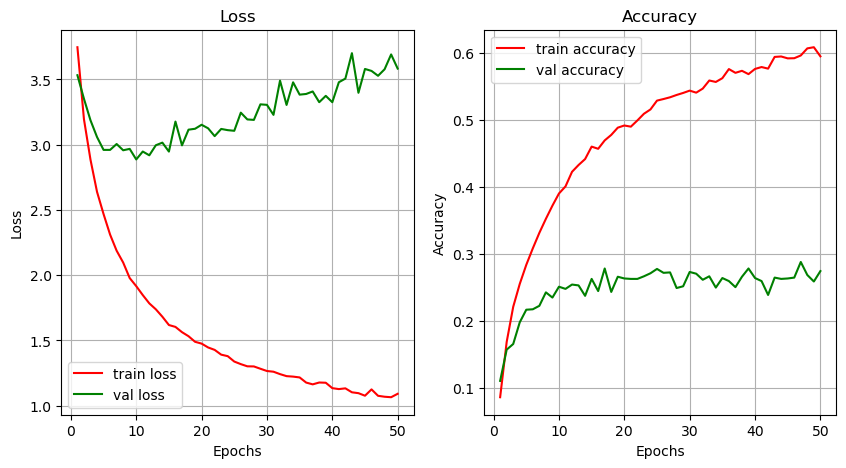

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

historyData = hist.history

fig = plt.figure(figsize=(10, 5))
ax0 = fig.add_subplot(1,2, 1)
ax0.set_title('Loss')
ax0.grid()
ax0.set_xlabel('Epochs')
ax0.set_ylabel('Loss')
ax0.plot(range(1,len(historyData['loss'])+1), historyData['loss'], c='red', label ='train loss' )
ax0.plot(range(1,len(historyData['val_loss'])+1), historyData['val_loss'], c='green', label ='val loss' )
ax0.legend()

ax1 = fig.add_subplot(1,2, 2)
ax1.set_title('Accuracy')
ax1.grid()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.plot(range(1,len(historyData['accuracy'])+1), historyData['accuracy'], c='red', label ='train accuracy' )
ax1.plot(range(1,len(historyData['val_accuracy'])+1), historyData['val_accuracy'], c='green', label ='val accuracy' )
ax1.legend()

result = modelDis.evaluate(dataTrain_dis['test_x'], dataTrain_dis['test_y'])
print('result: ', result)

## 5.2 Decay Model

In [105]:
class ModelThirdPlace:
  def __init__(self, path):
    self.path = path
    [self.X_raw, self.y_raw] = getData(path)
    self.data_train = processDataForTrain(self.X_raw, self.y_raw)

  def buildModel(self):
    self.model = Sequential()
    self.model.add(Dense(1024, input_dim=self.data_train['train_x'].shape[1], activation='relu'))
    self.model.add(Dense(512, activation='relu'))
    self.model.add(Dense(self.data_train['train_y'].shape[1], activation='softmax'))
    self.model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])
  def fit(self):
    return self.model.fit( 
      self.data_train['train_x'], self.data_train['train_y'], 
      validation_data=(self.data_train['test_x'], self.data_train['test_y']), 
      batch_size=32,
      epochs=50, 
    )
  def eval(self):
    print('result: ', self.model.evaluate(self.data_train['test_x'], self.data_train['test_y']))


In [106]:
path = 'data/cooked/google-third-place-Boston_DecayClosest.csv'
modelDecay = ModelThirdPlace(path)
modelDecay.buildModel()
hist = modelDecay.fit()

(6179, 96)
      beauty_salon    campground       stadium       airport    car_rental  \
0     1.000000e+00  6.655611e-05  9.376459e-04  3.725936e-37  8.108420e-06   
1     6.655611e-05  1.000000e+00  2.691249e-03  2.844849e-38  6.607408e-10   
2     2.725920e-13  1.000000e+00  5.235076e-01  9.149446e-28  7.732618e-15   
3     2.734018e-26  1.000000e+00  6.351248e-02  1.114530e-11  1.223515e-10   
4     2.830690e-13  1.937011e-17  1.000000e+00  1.578218e-35  2.462712e-08   
...            ...           ...           ...           ...           ...   
6174  7.668313e-27  3.609477e-09  1.172767e-08  4.019691e-16  4.419284e-19   
6175  3.983069e-33  1.641594e-15  4.737000e-08  2.371153e-18  4.581462e-25   
6176  3.285757e-33  2.528984e-15  7.405170e-08  4.883594e-18  7.674449e-25   
6177  1.625381e-33  1.769428e-15  1.502350e-07  5.472805e-18  5.919625e-25   
6178  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

      locksmith       embassy      cafe       laundr

49/49 [==============================] - 0s 814us/step - loss: 1.3477 - accuracy: 0.7055
result:  [1.3476765155792236, 0.7055016160011292]


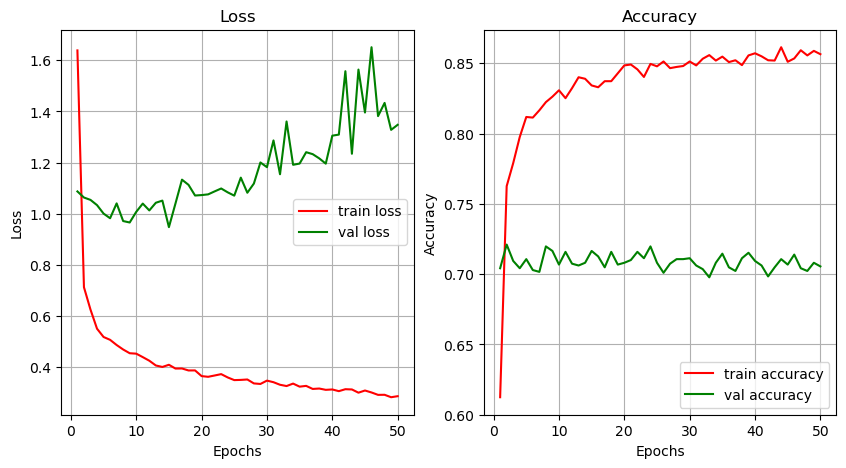

In [107]:
historyData = hist.history

fig = plt.figure(figsize=(10, 5))
ax0 = fig.add_subplot(1,2, 1)
ax0.set_title('Loss')
ax0.grid()
ax0.set_xlabel('Epochs')
ax0.set_ylabel('Loss')
ax0.plot(range(1,len(historyData['loss'])+1), historyData['loss'], c='red', label ='train loss' )
ax0.plot(range(1,len(historyData['val_loss'])+1), historyData['val_loss'], c='green', label ='val loss' )
ax0.legend()

ax1 = fig.add_subplot(1,2, 2)
ax1.set_title('Accuracy')
ax1.grid()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.plot(range(1,len(historyData['accuracy'])+1), historyData['accuracy'], c='red', label ='train accuracy' )
ax1.plot(range(1,len(historyData['val_accuracy'])+1), historyData['val_accuracy'], c='green', label ='val accuracy' )
ax1.legend()

modelDecay.eval()

## 5.3 Prediction

In [108]:
import math
import json
def OpenJson(path): 
    json_file = open(path , 'r')
    json_str = json_file.read()
    json_data = json.loads(json_str)
    return json_data
def getDecay(cost, b = 0.01): # { // 0.002 // 0.999
    return math.pow(1 - b, cost)
def distanceGPS2KM(l0, l1): # get distance(KM)
    R = 6378.137; # Radius of earth in KM // a = Equatorial radius (6,378.1370 km) // b = Polar radius (6,356.7523 km)
    dLat = l1['lat'] * math.pi / 180 - l0['lat'] * math.pi / 180
    dLon = l1['lon'] * math.pi / 180 - l0['lon'] * math.pi / 180
    a = math.sin(dLat / 2) * math.sin(dLat / 2) + math.cos(l0['lat'] * math.pi / 180) * math.cos(l1['lat'] * math.pi / 180) * math.sin(dLon / 2) * math.sin(dLon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = R * c
    return d # * 1000; # // * 1000; // meters
    # return d; # // * 1000; // meters
def distanceGPS2Meter(l0, l1):
    return distanceGPS2KM(l0, l1) * 1000
def distance2(x0, y0, x1, y1):
    return ((x1 - x0) * (x1 - x0)) + ((y1 - y0) * (y1 - y0))
def distance(l0, l1):
    return math.sqrt(distance2(l0['lon'], l0['lat'], l1['lon'], l1['lat']))
def GetDistanceClosest (loc, data, classList):
    distanceList = []
    for i in classList:
        distanceValue = 10000
        for j in range(len(data[i])):
            otherLoc = data[i][j]
            value = distanceGPS2Meter(loc, otherLoc)
            if (value < distanceValue):
                distanceValue = value
        distanceList.append(distanceValue)
    return distanceList
def GetDistanceDecayClosest(loc, data, classList, BATA = 0.01):
    distanceList = []
    for i in classList:
        distanceValue = 0
        for j in range(len(data[i])):
            otherLoc = data[i][j]
            value = getDecay(distanceGPS2Meter(loc, otherLoc), BATA)
            if distanceValue < value:
                distanceValue = value
        # if len(data[i]) != 0:
        #     distanceValue = distanceValue / len(data[i])
        distanceList.append(distanceValue)
    return distanceList

In [109]:
THE_PATH = "data/raw/google-third-place-Boston.json"
DATA_DIC = OpenJson(THE_PATH)
CLASS_LIST = []
for i in DATA_DIC:
    if i not in CLASS_LIST:
        CLASS_LIST.append(i)

print(len(CLASS_LIST))
print(CLASS_LIST)

95
['beauty_salon', 'campground', 'stadium', 'airport', 'car_rental', 'locksmith', 'embassy', 'cafe', 'laundry', 'aquarium', 'convenience_store', 'moving_company', 'car_wash', 'bus_station', 'rv_park', 'dentist', 'shopping_mall', 'hospital', 'store', 'car_dealer', 'home_goods_store', 'grocery_or_supermarket', 'restaurant', 'bank', 'painter', 'insurance_agency', 'health', 'post_office', 'department_store', 'city_hall', 'parking', 'night_club', 'car_repair', 'bowling_alley', 'bicycle_store', 'veterinary_care', 'subway_station', 'synagogue', 'liquor_store', 'local_government_office', 'roofing_contractor', 'shoe_store', 'florist', 'train_station', 'food', 'art_gallery', 'hindu_temple', 'travel_agency', 'gym', 'electrician', 'doctor', 'accounting', 'amusement_park', 'movie_theater', 'bar', 'atm', 'taxi_stand', 'electronics_store', 'church', 'pet_storepharmacy', 'library', 'book_store', 'cemetery', 'general_contractor', 'funeral_home', 'clothing_store', 'mosque', 'gas_station', 'police', 'lo

In [110]:

# https://www.google.com/maps/@42.3334714,-71.0793878,16.46z
# https://www.google.com/maps/@42.345085,-71.0674257,17z
# https://www.google.com/maps/place/75-113+St+James+Ave+Parking/@42.3502316,-71.0760466,17.98z

locs = [
    { 'lat': 42.345085, 'lon':-71.0674257 },
    { 'lat': 42.3334714, 'lon':-71.0793878 },
    { 'lat': 42.341134, 'lon':-71.082955 },
    { 'lat': 42.3502316, 'lon':-71.0760466 },
]

resultsDis = []
resultsDecay = []
for i in locs:
    result = GetDistanceClosest(i, DATA_DIC, CLASS_LIST)
    resultsDis.append(result)
    
    result = GetDistanceDecayClosest(i, DATA_DIC, CLASS_LIST)
    resultsDecay.append(result)

resultsDis = dataTrain_dis['scaler'].transform(resultsDis)
resultsDecay = modelDecay.data_train['scaler'].transform(resultsDecay)

In [111]:
predictionsDecay = modelDecay.model.predict(resultsDecay)
print(predictionsDecay.shape)

predictionsDis = modelDis.predict(resultsDis)
print(predictionsDis.shape)

for i in range(predictionsDis.shape[0]):
    print('model by distance: ', CLASS_LIST[np.argmax(predictionsDis[i])]) 

print('------------------')

for i in range(predictionsDecay.shape[0]):
    print('model by decay: ', CLASS_LIST[np.argmax(predictionsDecay[i])]) 

1/1 [==============================] - 0s 33ms/step
(4, 95)
1/1 [==============================] - 0s 19ms/step
(4, 95)
model by distance:  locksmith
model by distance:  furniture_store
model by distance:  subway_station
model by distance:  dentist
------------------
model by decay:  locksmith
model by decay:  furniture_store
model by decay:  atm
model by decay:  dentist


## 5.4 Decay Model (small) and Prediction

In [112]:
class ModelThirdPlaceSmall(ModelThirdPlace):
  def buildModel(self):
    self.model = Sequential()
    self.model.add(Dense(95, input_dim=self.data_train['train_x'].shape[1], activation='relu'))
    self.model.add(Dropout(0.75))
    self.model.add(Dense(self.data_train['train_y'].shape[1], activation='softmax'))
    self.model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

In [113]:
paths = [
    'data/cooked/google-third-place-Boston_DistanceClosest.csv',
    'data/cooked/google-third-place-Boston_DecayClosest.csv',
]

model = ModelThirdPlaceSmall(paths[0])
model.buildModel()
model.fit()
model.eval()
resultsDisScaled = model.data_train['scaler'].transform(resultsDis)
predictionsDis = model.model.predict(resultsDisScaled)
for i in range(predictionsDis.shape[0]):
    print('model by distance: ', CLASS_LIST[np.argmax(predictionsDis[i])]) 

(6179, 96)
      beauty_salon    campground       stadium       airport    car_rental  \
0         0.000000    956.929726    693.721915   8346.022623   1166.389635   
1       956.929726      0.000000    588.811145   8601.973573   2103.179410   
2      2878.590389      0.000000     64.396229   6194.687440   3233.059010   
3      5856.663978      0.000000    274.271322   2509.369231   2270.981159   
4      2874.837820   3829.006426      0.000000   7973.283978   1743.167382   
...            ...           ...           ...           ...           ...   
6174   5983.153369   1934.234151   1816.985521   3527.260875   4205.146931   
6175   7422.961444   3387.260803   1678.080905   4037.989962   5576.192675   
6176   7442.110614   3344.262229   1633.627229   3966.101314   5524.863218   
6177   7512.143541   3379.799512   1563.237814   3954.767374   5550.695524   
6178  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   

         locksmith       embassy          cafe      

In [114]:
model = ModelThirdPlaceSmall(paths[1])
model.buildModel()
model.fit()
model.eval()
resultsDisScaled = model.data_train['scaler'].transform(resultsDecay)
resultsDecay = model.model.predict(resultsDisScaled)
for i in range(resultsDecay.shape[0]):
    print('model by distance: ', CLASS_LIST[np.argmax(resultsDecay[i])]) 

(6179, 96)
      beauty_salon    campground       stadium       airport    car_rental  \
0     1.000000e+00  6.655611e-05  9.376459e-04  3.725936e-37  8.108420e-06   
1     6.655611e-05  1.000000e+00  2.691249e-03  2.844849e-38  6.607408e-10   
2     2.725920e-13  1.000000e+00  5.235076e-01  9.149446e-28  7.732618e-15   
3     2.734018e-26  1.000000e+00  6.351248e-02  1.114530e-11  1.223515e-10   
4     2.830690e-13  1.937011e-17  1.000000e+00  1.578218e-35  2.462712e-08   
...            ...           ...           ...           ...           ...   
6174  7.668313e-27  3.609477e-09  1.172767e-08  4.019691e-16  4.419284e-19   
6175  3.983069e-33  1.641594e-15  4.737000e-08  2.371153e-18  4.581462e-25   
6176  3.285757e-33  2.528984e-15  7.405170e-08  4.883594e-18  7.674449e-25   
6177  1.625381e-33  1.769428e-15  1.502350e-07  5.472805e-18  5.919625e-25   
6178  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

      locksmith       embassy      cafe       laundr